# Task 1 Iris Flower Classification @ LetsGrowMore

## Completed by Kyle Parsotan


# Completed this project by using classification methods:

### 1. K-nearest Neighbours
### 2. Decision Tree
### 3. Random Forest

#### class of iris plant: 
#### Iris Setosa, 
#### Iris Versicolour, 
#### or Iris Virginica

### 1. Petal length and width
### 2. sepal width and length

# Import data set and visualize the data set
### Data set from Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
  
# read the csv file
set = 'iris.csv'

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

dataset = pd.read_csv(set, names=columns)
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [40]:
dataset.shape

(150, 5)

In [41]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing the dataset

# check for null and 0s


In [43]:
dataset.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

# Scatter Plot

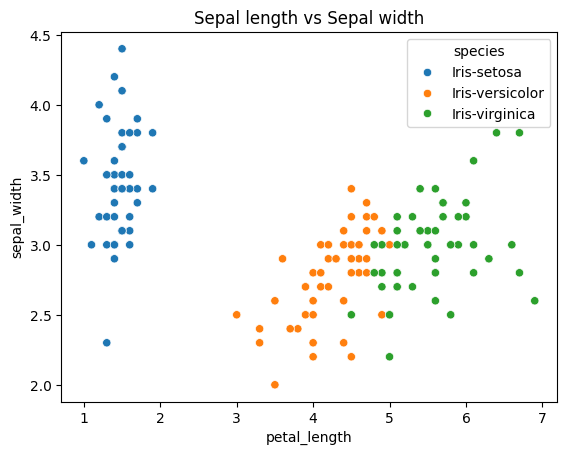

In [45]:
# scatter plot petal length vs sepal width for each species
sns.scatterplot(
    data=dataset,
    y='sepal_width',
    x='petal_length',
    hue='species'
)
plt.title("Petal length vs Sepal width")
plt.show()


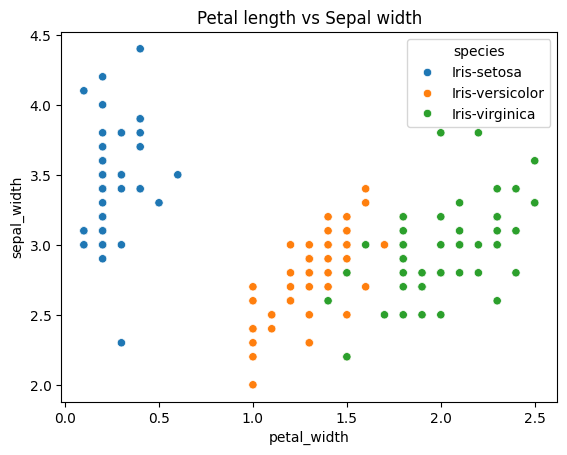

In [54]:
# scatter plot petal length vs sepal width for each species
sns.scatterplot(
    data=dataset,
    y='sepal_width',
    x='petal_width',
    hue='species'
)
plt.title("Petal length vs Sepal width")
plt.show()

In [ ]:
sns.lineplot(data=dataset, hue="species", style="species")

# Heat map

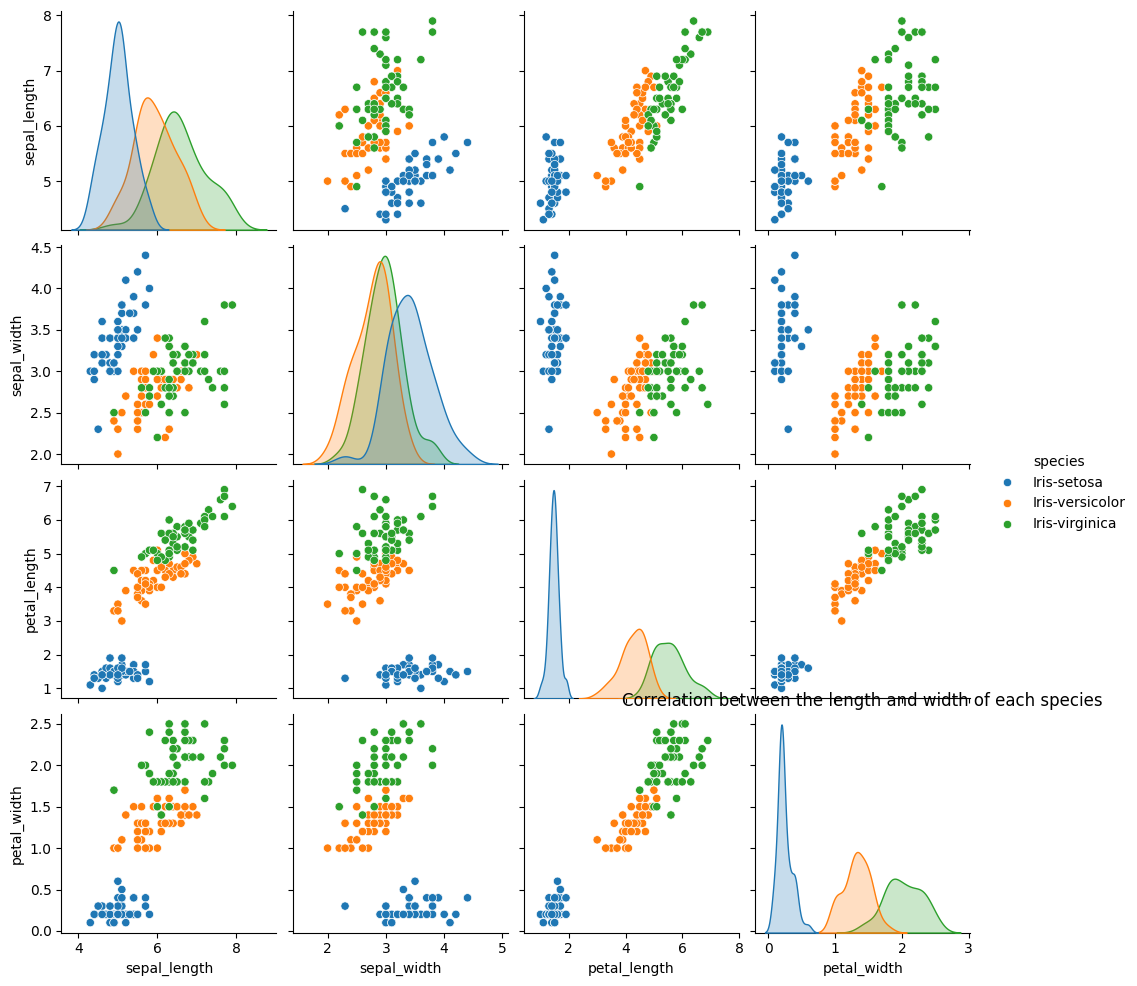

In [46]:
#pair plot based on species
sns.pairplot(dataset, hue="species")
# plt.title("Correlation between the length and width of each species")
plt.show()

# Correlation Matrix

In [47]:
# read the csv file
set = 'iris.csv'

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

datasets = pd.read_csv(set)

datasets.drop(datasets.columns[[4]], axis=1, inplace=True)

print(datasets)

# matrix = dataset.corr()
# print(matrix)

     5.1  3.5  1.4  0.2
0    4.9  3.0  1.4  0.2
1    4.7  3.2  1.3  0.2
2    4.6  3.1  1.5  0.2
3    5.0  3.6  1.4  0.2
4    5.4  3.9  1.7  0.4
..   ...  ...  ...  ...
144  6.7  3.0  5.2  2.3
145  6.3  2.5  5.0  1.9
146  6.5  3.0  5.2  2.0
147  6.2  3.4  5.4  2.3
148  5.9  3.0  5.1  1.8

[149 rows x 4 columns]


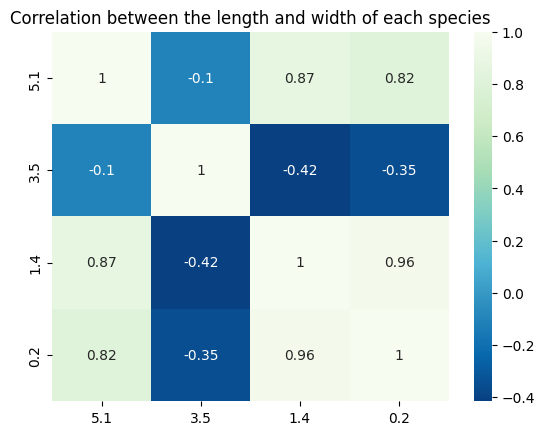

In [48]:
# plotting correlation matrix
# print(dataset)

sns.heatmap(datasets.corr(), annot=True, cmap='GnBu_r')
plt.title("Correlation between the length and width of each species")
plt.show()

In [49]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Label Encoder

In [50]:
X = dataset.columns
X

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Model training
### support vector machine algorithm

In [51]:
dataset.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [52]:
## Logistic Regression
y = dataset.sepal_width
y

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

## Intermediate Prediction using Decision Tree

### Decision Tree Classifier

In [53]:
# using decision tree to predict the different species width and length 
from sklearn.tree import DecisionTreeRegressor

# Define the model
dataset_model = DecisionTreeRegressor()

# fit the model
# dataset_model.fit(X, y)